## LamaH-CE (Central Europe)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/LamaH-CE.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/LamaH-CE.ipynb)


This notebook explores LamaH-CE dataset which was introduced by [Klingler et al., 2021](https://essd.copernicus.org/articles/13/4529/2021/essd-13-4529-2021.html).

In [4]:
from ai4water.eda import EDA
from ai4water.datasets import LamaH
from ai4water.utils.utils import get_version_info

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar

In [5]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [8]:
dataset = LamaH(
    path=r"D:\data\LamaH",   # set path to None if you have not already downloaded data
    time_step="daily",
    data_type = "total_upstrm",
)


In [9]:
dataset.start

'19810101'

In [10]:
dataset.end

'20191231'

In [11]:
stations = dataset.stations()
len(stations)

859

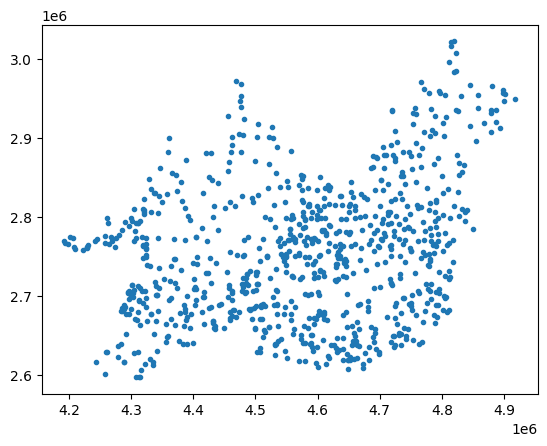

<AxesSubplot: >

In [12]:
dataset.plot_stations()

In [13]:
dataset.static_features

['area_calc',
 'elev_mean',
 'elev_med',
 'elev_std',
 'elev_ran',
 'slope_mean',
 'mvert_dist',
 'mvert_ang',
 'elon_ratio',
 'strm_dens',
 'p_mean',
 'et0_mean',
 'eta_mean',
 'aridity',
 'p_season',
 'frac_snow',
 'hi_prec_fr',
 'hi_prec_du',
 'hi_prec_ti',
 'lo_prec_fr',
 'lo_prec_du',
 'lo_prec_ti',
 'lc_dom',
 'agr_fra',
 'bare_fra',
 'forest_fra',
 'glac_fra',
 'lake_fra',
 'urban_fra',
 'lai_max',
 'lai_diff',
 'ndvi_max',
 'ndvi_min',
 'gvf_max',
 'gvf_diff',
 'bedrk_dep',
 'root_dep',
 'soil_poros',
 'soil_condu',
 'soil_tawc',
 'sand_fra',
 'silt_fra',
 'clay_fra',
 'grav_fra',
 'oc_fra',
 'gc_dom',
 'gc_ig_fra',
 'gc_mt_fra',
 'gc_pa_fra',
 'gc_pb_fra',
 'gc_pi_fra',
 'gc_py_fra',
 'gc_sc_fra',
 'gc_sm_fra',
 'gc_ss_fra',
 'gc_su_fra',
 'gc_va_fra',
 'gc_vb_fra',
 'gc_wb_fra',
 'geol_perme',
 'geol_poros']

In [14]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(859, 61)

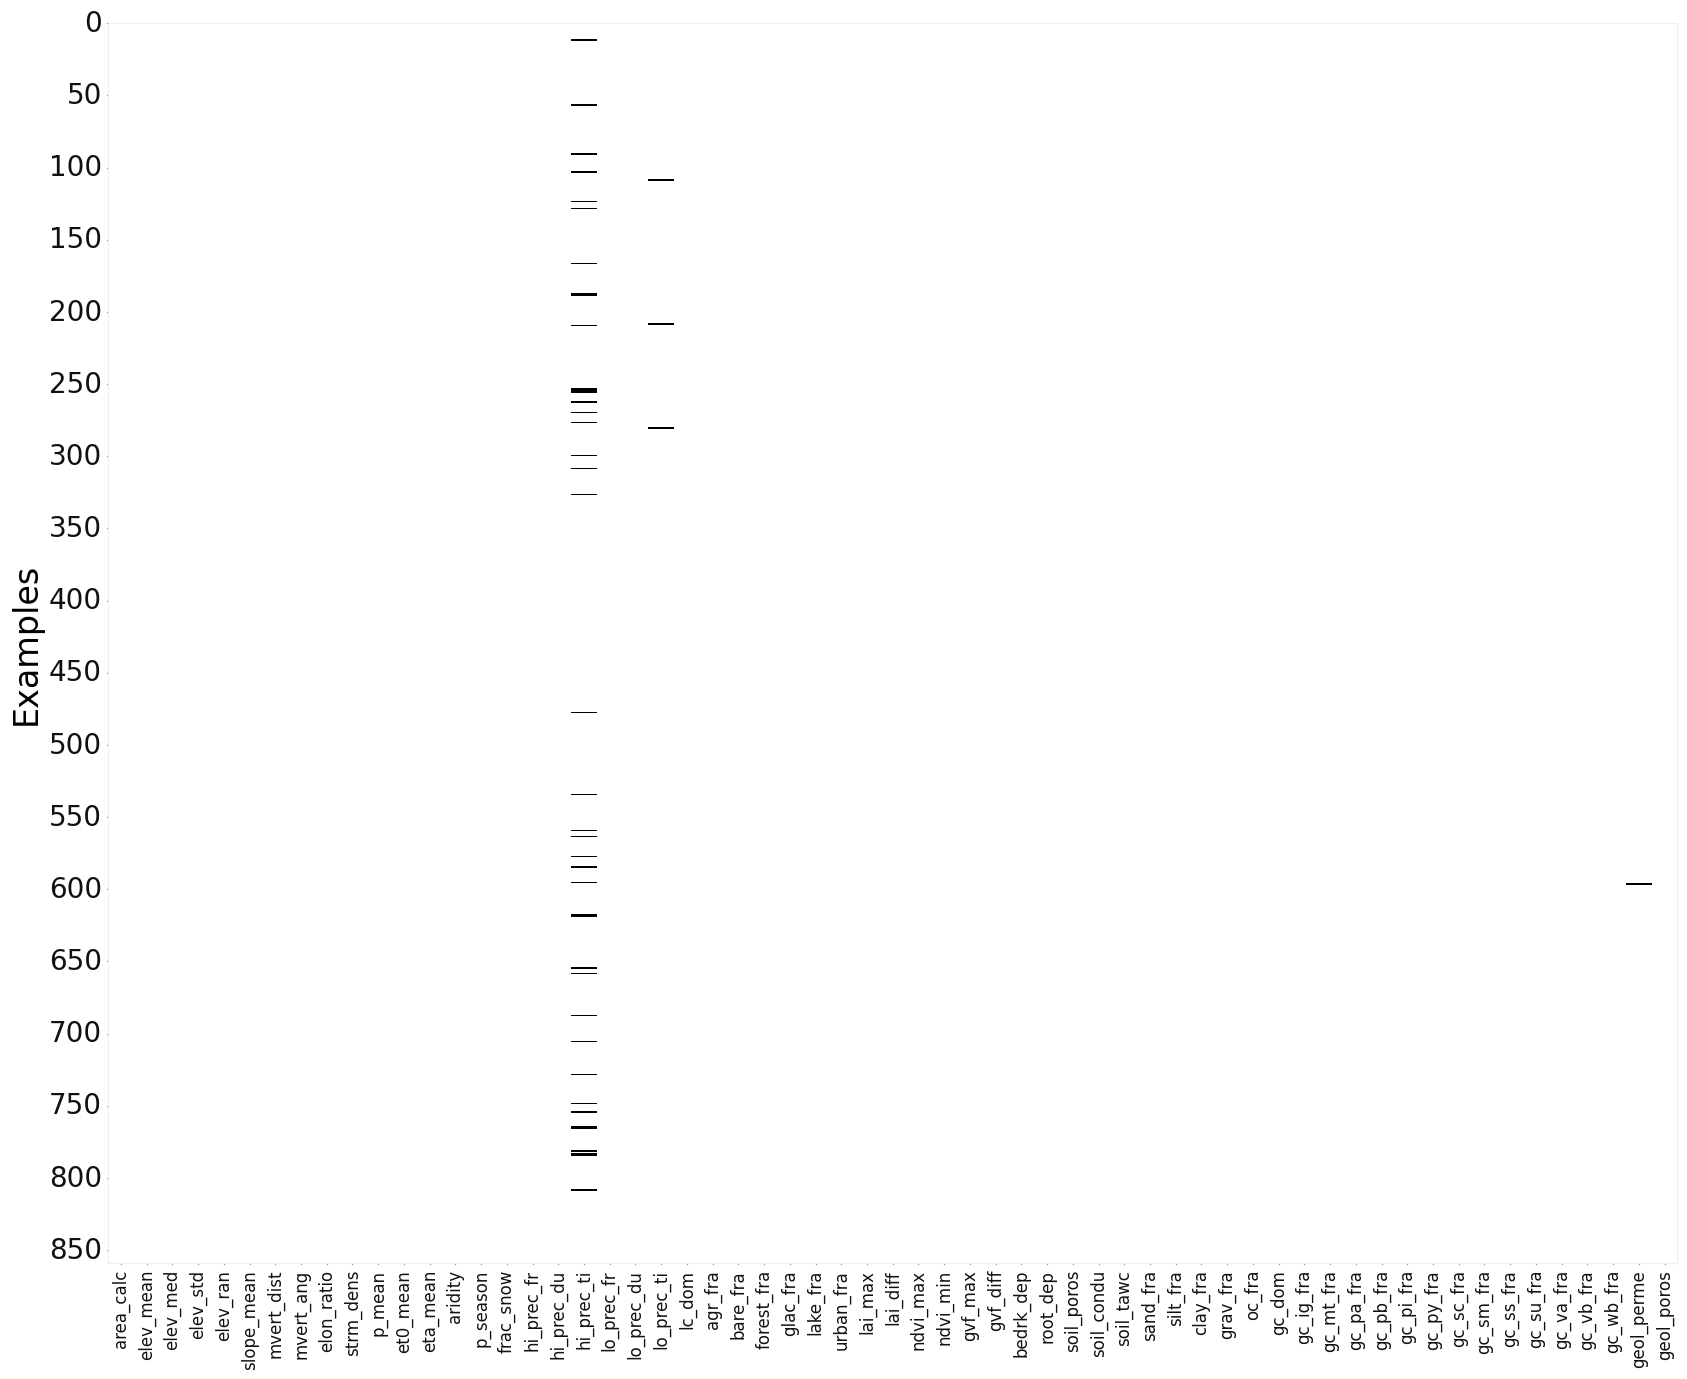

<AxesSubplot: ylabel='Examples'>

In [15]:
EDA(data=static, save=False).heatmap()

In [16]:
static = static.dropna(axis=1)
static.shape

(859, 58)

In [17]:
coords = dataset.stn_coords()
lat = coords['lat'].astype(float).values.reshape(-1,)
long = coords['long'].astype(float).values.reshape(-1,)

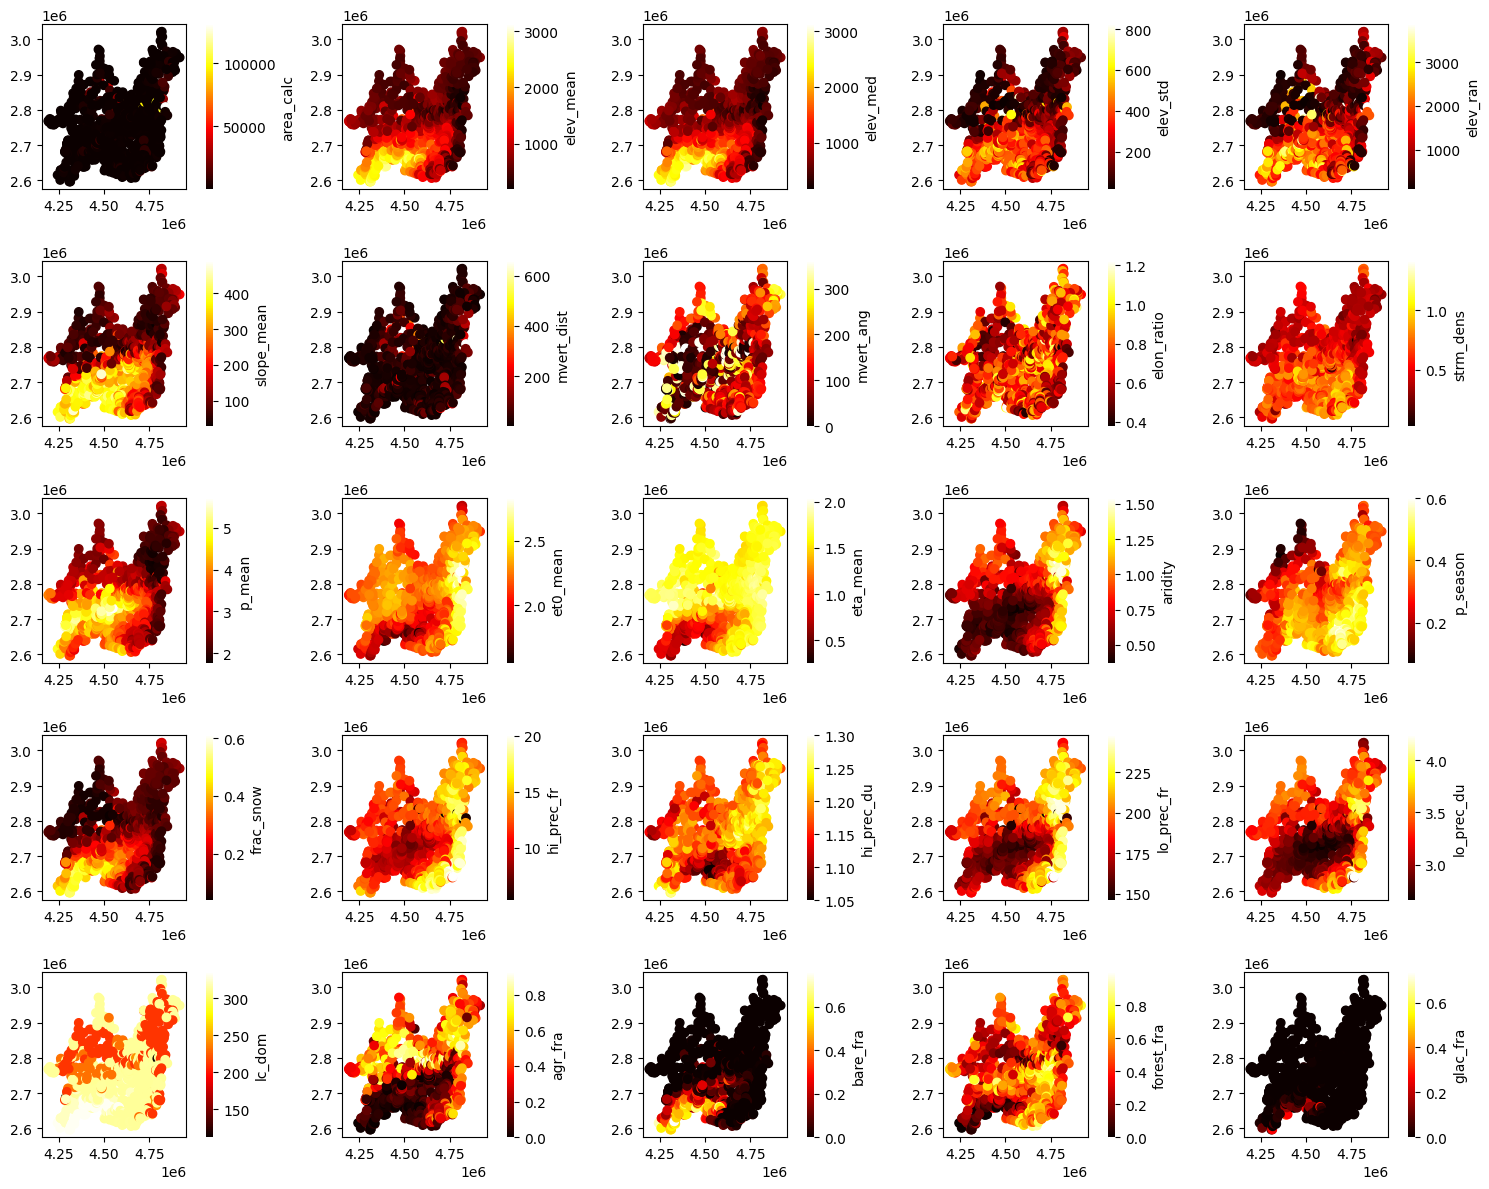

25


In [18]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

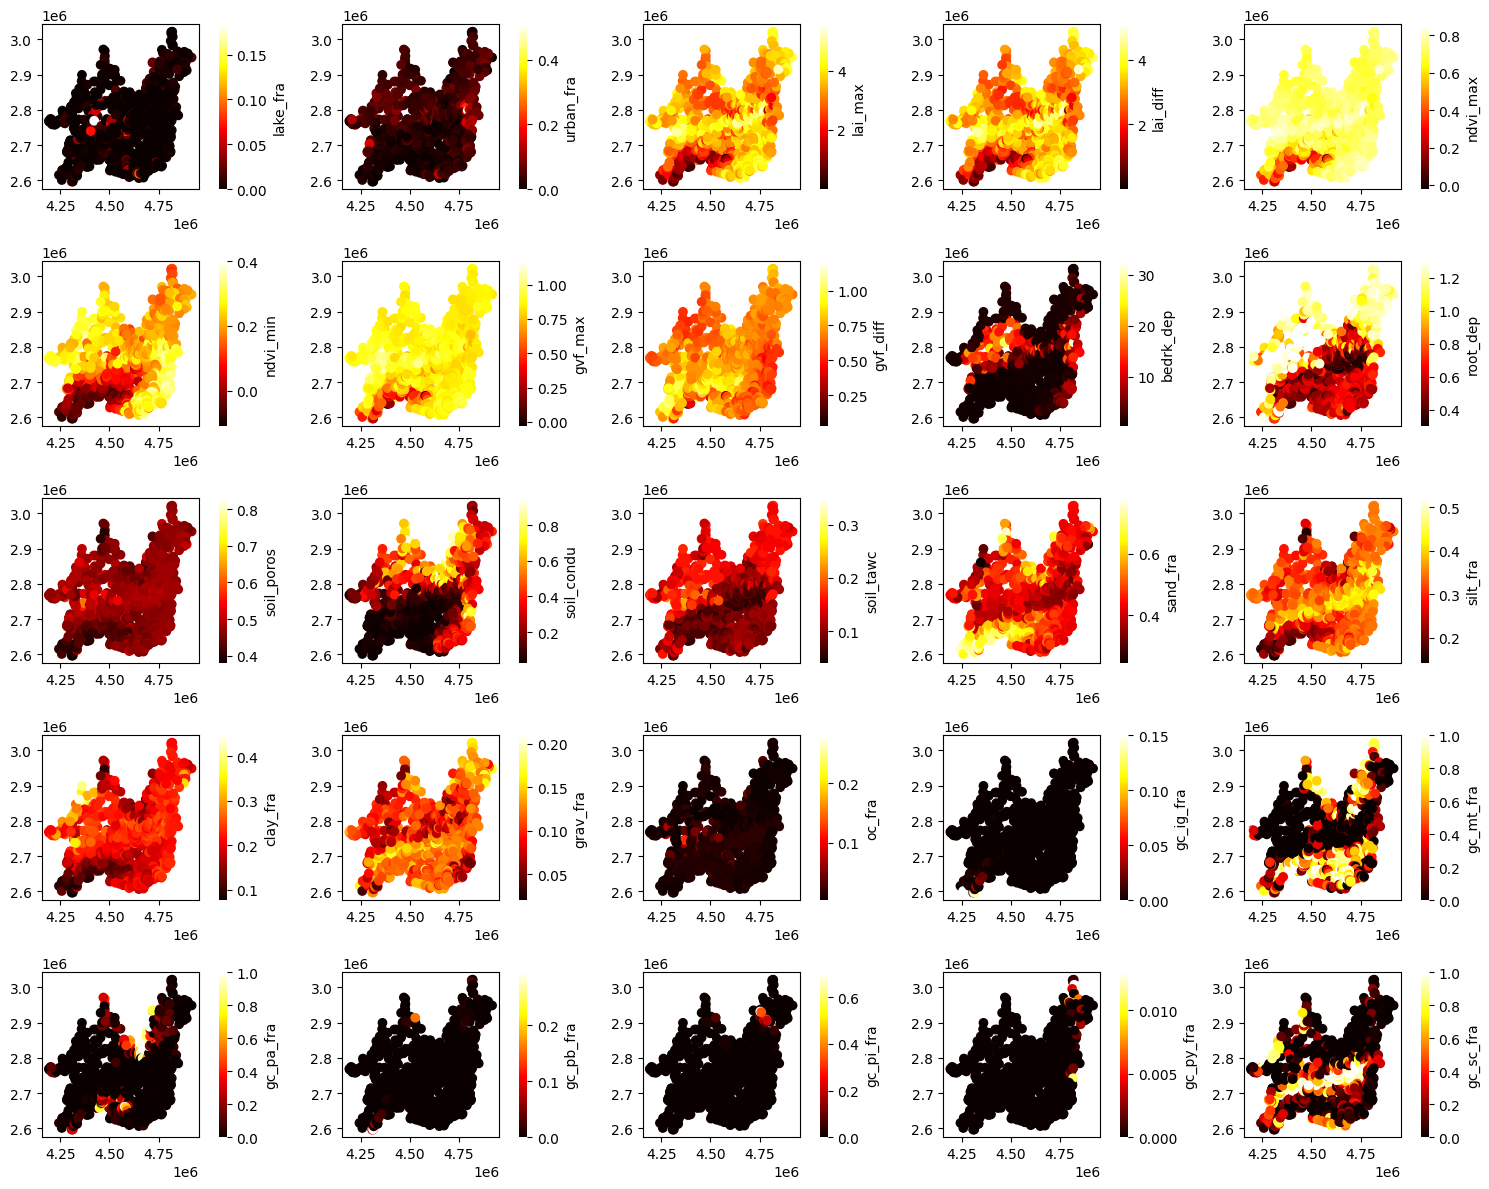

51


In [19]:
idx = 25
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

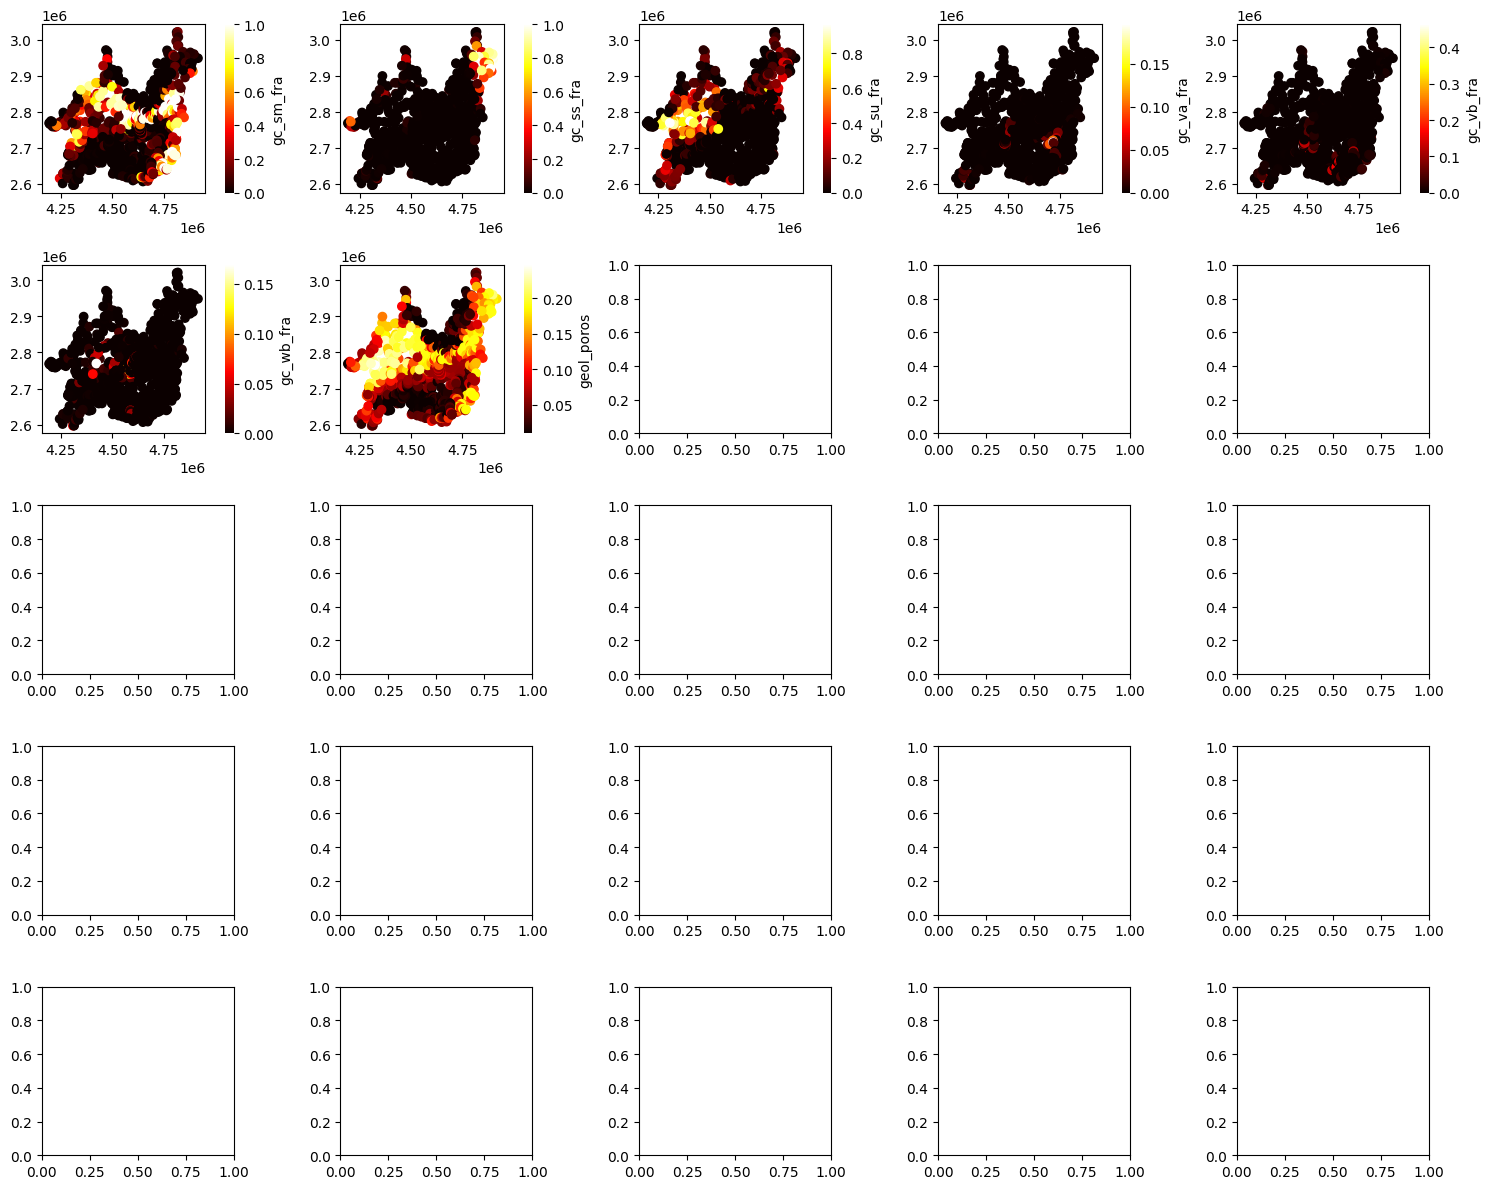

58


In [20]:
idx = 51
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

In [21]:
dataset.dynamic_features

['DOY',
 '2m_temp_max',
 '2m_temp_mean',
 '2m_temp_min',
 '2m_dp_temp_max',
 '2m_dp_temp_mean',
 '2m_dp_temp_min',
 '10m_wind_u',
 '10m_wind_v',
 'fcst_alb',
 'lai_high_veg',
 'lai_low_veg',
 'swe',
 'surf_net_solar_rad_max',
 'surf_net_solar_rad_mean',
 'surf_net_therm_rad_max',
 'surf_net_therm_rad_mean',
 'surf_press',
 'total_et',
 'prec',
 'volsw_123',
 'volsw_4',
 'q_cms',
 'checked']

### Streamflow

In [22]:
streamflow = dataset.q_mmd()
streamflow.shape

(13514, 859)

In [23]:
EDA(data=streamflow, save=False).heatmap()

<AxesSubplot: ylabel='Examples'>

In [24]:

def plot_hist(st = 0, figsize=(10, 10)):

    fig, axes = plt.subplots(7, 7, figsize=figsize, sharey="all")

    idx = st
    for _, ax in enumerate(axes.flat):
        hist(streamflow.iloc[:, idx].values.reshape(-1, ),
             bins=20,
             ax=ax,
             show=False
             )

        idx += 1

    plt.show()
    print(idx)
    return 


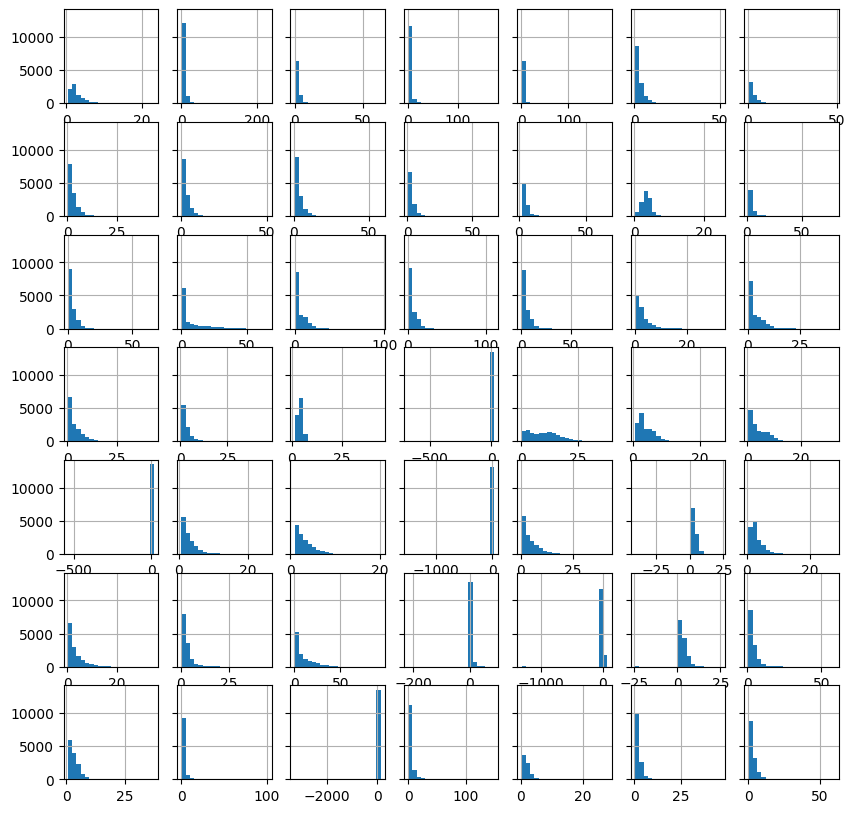

49


In [25]:
plot_hist(0)

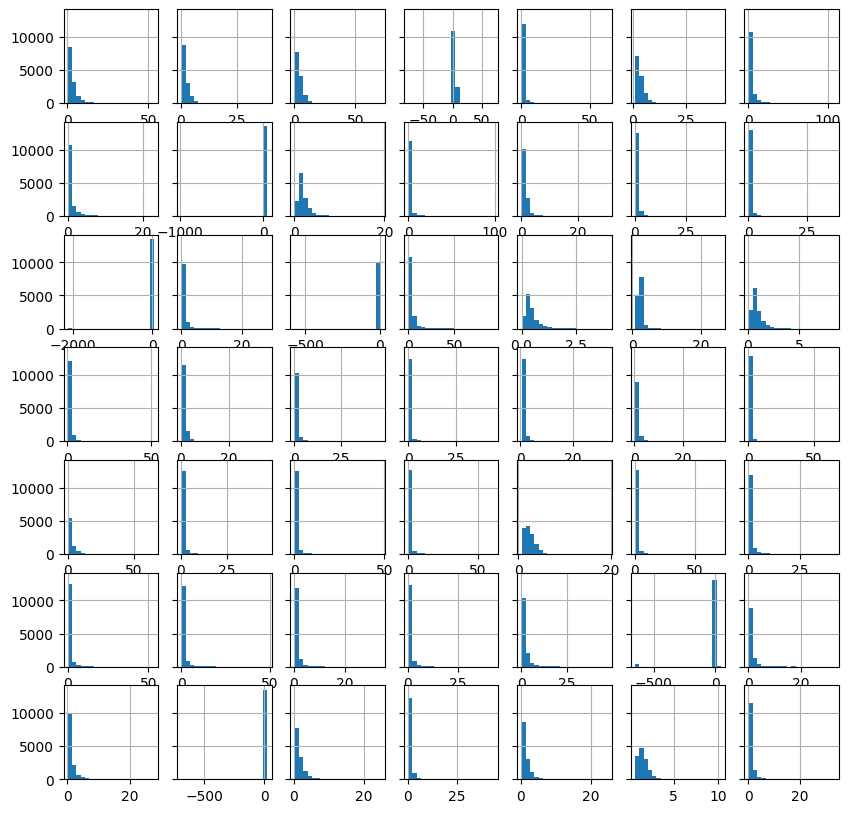

98


In [26]:
plot_hist(49)

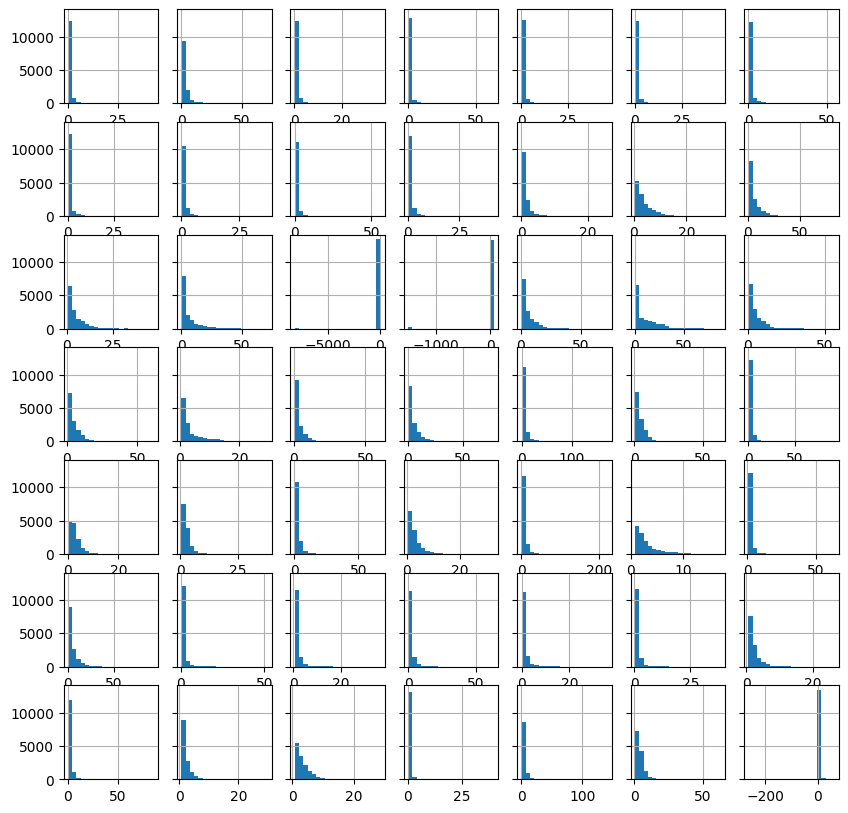

147


In [27]:
plot_hist(98)

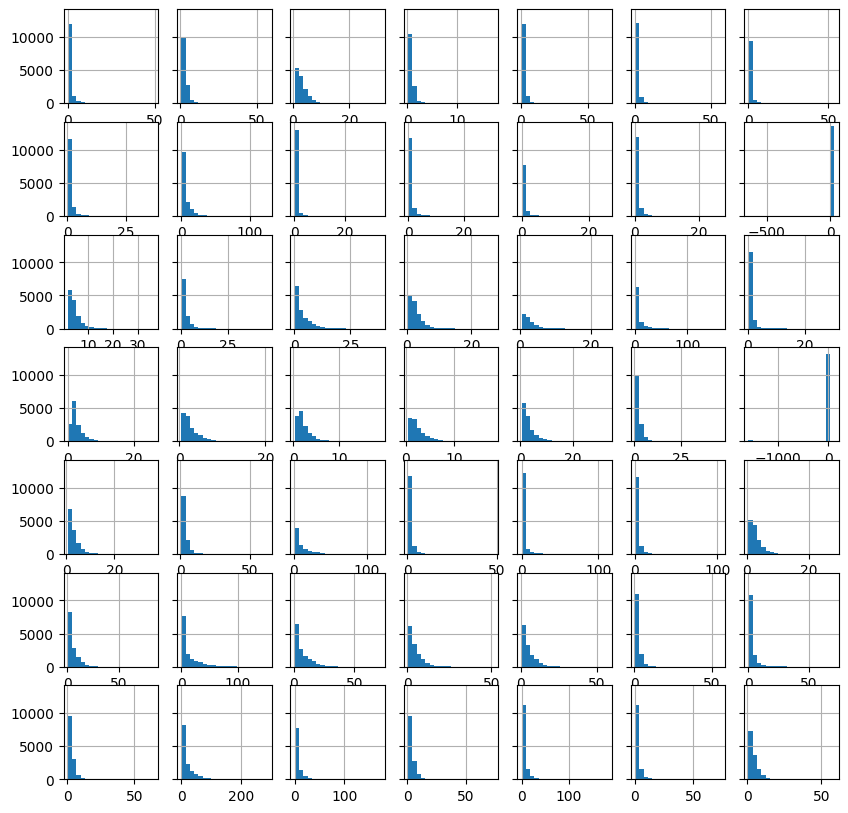

196


In [28]:
plot_hist(147)

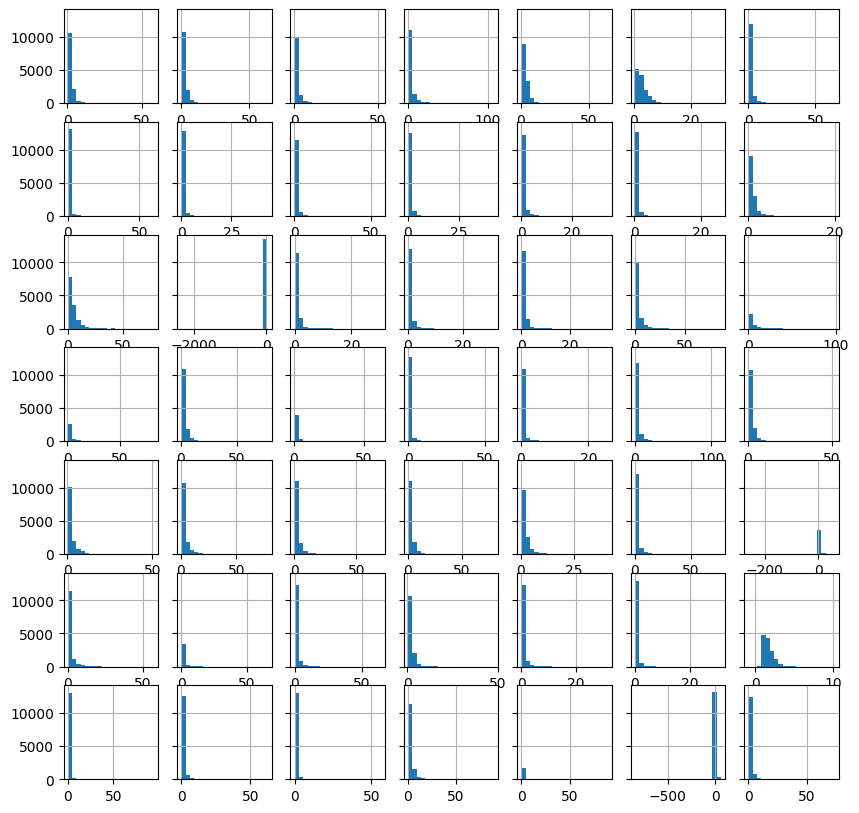

245


In [29]:
plot_hist(196)